In [5]:
import h3
import folium
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
offers = pd.read_csv('data_offers.csv')
orders = pd.read_csv('data_orders.csv')

(1)

In [22]:
# driver is assigned and order cancelled by client
driver_yes_calcelled_client = orders[(orders['is_driver_assigned_key'] == 1) & (orders['order_status_key'] == 4)]
driver_no_calcelled_client = orders[(orders['is_driver_assigned_key'] == 0) & (orders['order_status_key'] == 4)]
driver_yes_calcelled_system = orders[(orders['is_driver_assigned_key'] == 1) & (orders['order_status_key'] == 9)]
driver_no_calcelled_system = orders[(orders['is_driver_assigned_key'] == 0) & (orders['order_status_key'] == 9)]
print('driver_yes_calcelled_client:', driver_yes_calcelled_client.shape[0])
print('driver_no_calcelled_client:', driver_no_calcelled_client.shape[0])
print('driver_yes_calcelled_system:', driver_yes_calcelled_system.shape[0])
print('driver_no_calcelled_system:', driver_no_calcelled_system.shape[0])

driver_yes_calcelled_client: 2811
driver_no_calcelled_client: 4496
driver_yes_calcelled_system: 3
driver_no_calcelled_system: 3406


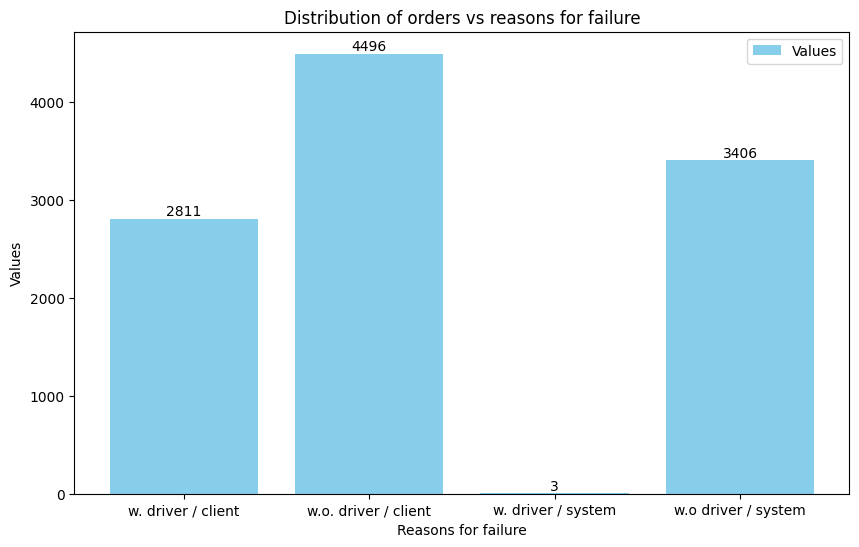

In [23]:
values = [driver_yes_calcelled_client.shape[0], driver_no_calcelled_client.shape[0], driver_yes_calcelled_system.shape[0], driver_no_calcelled_system.shape[0]]
labels = ['w. driver / client', 'w.o. driver / client', 'w. driver / system', 'w.o driver / system']
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.title('Distribution of orders vs reasons for failure')
plt.xlabel('Reasons for failure')
plt.ylabel('Values')

plt.legend(['Values'], loc='upper right')

plt.show()

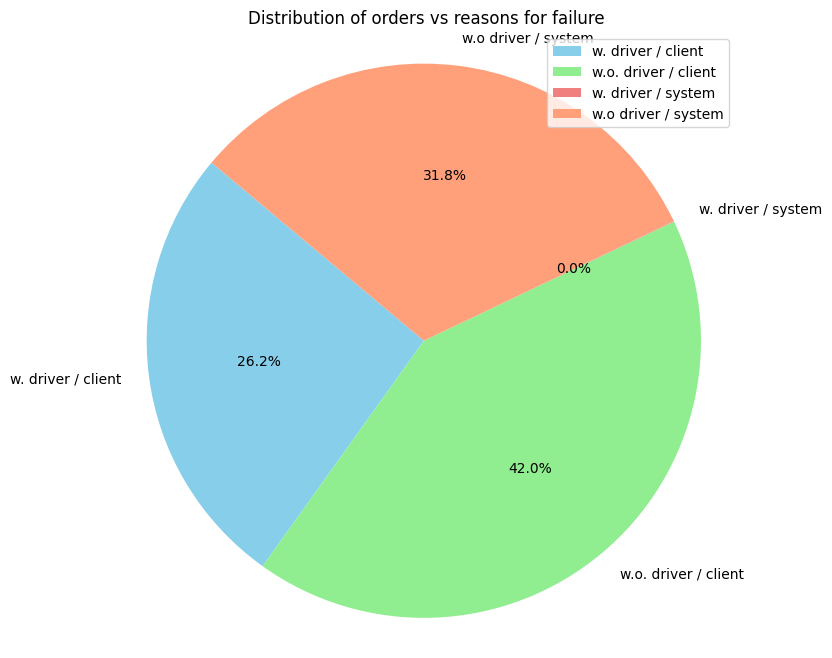

In [24]:
values = [driver_yes_calcelled_client.shape[0], driver_no_calcelled_client.shape[0], driver_yes_calcelled_system.shape[0], driver_no_calcelled_system.shape[0]]
labels = ['w. driver / client', 'w.o. driver / client', 'w. driver / system', 'w.o driver / system']

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon'], startangle=140)

plt.title('Distribution of orders vs reasons for failure')

plt.legend(loc='upper right')

plt.axis('equal')
plt.show()


The number of orders which are not assigned with driver and cancelled by clients is largest.

(2)

In [30]:
orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [29]:
def get_values_labels (df):
    order_time = {}
    for i in range(24):
        order_time[i] = 0
    order_timelist = df['order_datetime'].reset_index(drop=True)
    for i in range(len(order_timelist)):
        time = int(order_timelist[i][0:2])
        order_time[time] += 1
    values = []
    labels = []
    for key, value in order_time.items():
        labels.append(key+1)
        values.append(value)
    return values, labels

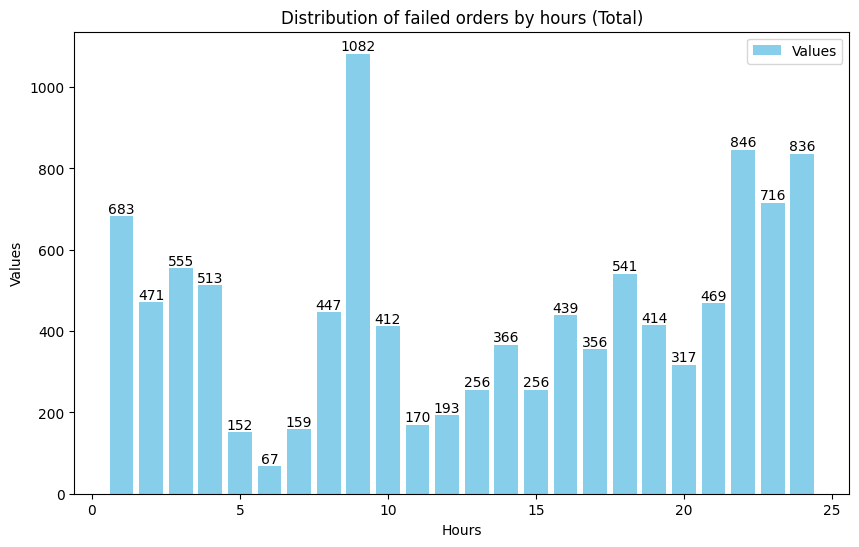

In [31]:
# Total
values, labels = get_values_labels(orders)
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.title('Distribution of failed orders by hours (Total)')
plt.xlabel('Hours')
plt.ylabel('Values')
plt.legend(['Values'], loc='upper right')
plt.show()

In total, 9 a.m shows up as an abnormally hour for high proportion of order failure. Also in the evening, the cancellation rate is high. The potential reason maybe the large number of orders exist in the corresponding period.

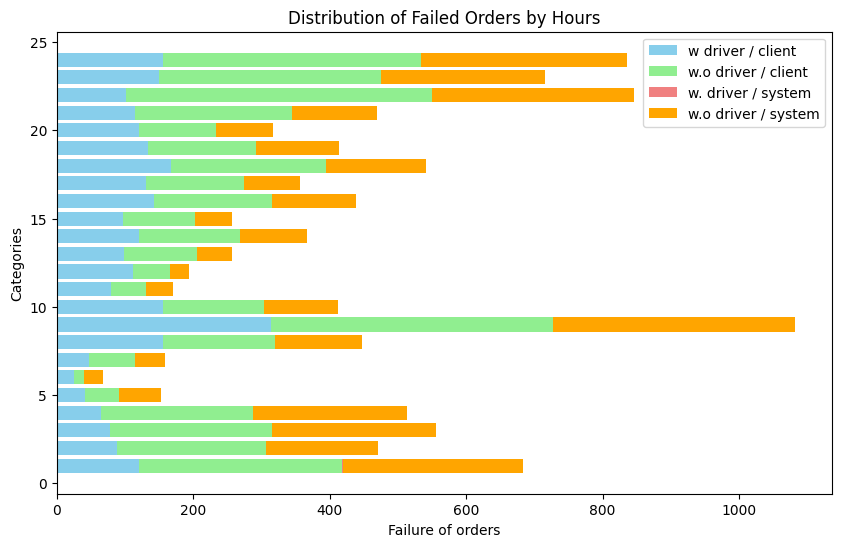

In [34]:
values1, labels = get_values_labels(driver_yes_calcelled_client) # w driver / client
values2, labels = get_values_labels(driver_no_calcelled_client) # w.o driver / client
values3, labels = get_values_labels(driver_yes_calcelled_system) # w. driver / system
values4, labels = get_values_labels(driver_no_calcelled_system) # # w.o driver / system

values1 = np.array(values1)
values2 = np.array(values2)
values3 = np.array(values3)
values4 = np.array(values4)

plt.figure(figsize=(10, 6))
plt.barh(labels, values1, color='skyblue', label='w driver / client')
plt.barh(labels, values2, left=values1, color='lightgreen', label='w.o driver / client')
plt.barh(labels, values3, left=values1+values2, color='lightcoral', label='w. driver / system')
plt.barh(labels, values4, left=values1+values2+values3, color='orange', label='w.o driver / system')

plt.xlabel('Failure of orders')
plt.ylabel('Categories')
plt.title('Distribution of Failed Orders by Hours')
plt.legend()

plt.show()

For the case of orders assigned with drivers and cancelled by clients, at 9 a.m. the number is abnormally high. Maybe the traffic is loaded and clients decided to take other transportation for work.

For the case of orders not assigned with drivers and cancelled by clients, there are two periods: 9 a.m and aroung 10 p.m. The reason maybe: 1. In the morning, clients have no time to wait for driver assignment and take other alternative transportation. 2. In the evening, client may have the need for arriving home on time, and for the safety at night (waiting driver making people anxious).

There are few order cancellations in this case. The company tends not to cancel the order when drivers are assigned for clients (for profits).

Also in 9 a.m (biggest fail) and late in the evening. The reason maybe the platform has too loaded and driver is limited. The clients need more time to wait. Cancel the order by the platform itself maybe a better choice for client wait too long, and cancel the order angrily.

(3)

In [9]:
client_cancelled = orders[orders['order_status_key'] == 4]

In [14]:
def get_avg (df):
    avg = []
    labels = []
    for i in range(24):
        labels.append(i+1)
        cancel_time = df.loc[df['order_datetime'] == i]['cancellations_time_in_seconds']
        q1 = np.percentile(cancel_time, 25)
        q3 = np.percentile(cancel_time, 75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        cleaned_data = [x for x in cancel_time if lower_bound <= x <= upper_bound]
        avg.append(round(np.mean(cleaned_data), 1))
    return avg, labels

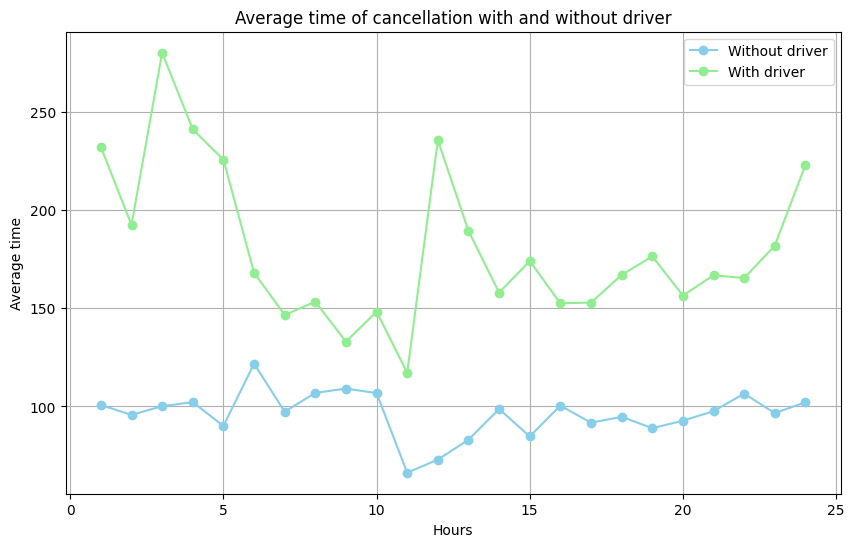

In [15]:
# without driver
without_driver = client_cancelled[client_cancelled['is_driver_assigned_key'] == 0].reset_index(drop=True)
without_driver['order_datetime'] = without_driver['order_datetime'].apply(lambda x: int(x[0:2]))
avg_without, labels = get_avg(without_driver)

# with driver
with_driver = client_cancelled[client_cancelled['is_driver_assigned_key'] == 1].reset_index(drop=True)
with_driver['order_datetime'] = with_driver['order_datetime'].apply(lambda x: int(x[0:2]))
avg_with, _ = get_avg(with_driver)

plt.figure(figsize=(10, 6))
plt.plot(labels, avg_without, marker='o', linestyle='-', color='skyblue', label='Without driver')
plt.plot(labels, avg_with, marker='o', linestyle='-', color='lightgreen', label='With driver')

plt.title('Average time of cancellation with and without driver')
plt.xlabel('Hours')
plt.ylabel('Average time')
plt.legend()

plt.grid(True)
plt.show()


When assigned with driver, the avg time would be small when aroung 9 a.m in the morning or 8 p.m in the evening. Even the clients are assigned with a driver, they have less patience in these time because of some urgent matter (like going to work or going back home or having meal...), making avg time to calcellation short.

When not assigned with a driver, the clients would choose to cancel the order in a short time at noon. The potential reason maybe the hot weather make them impatient for waiting a driver assignmnet.

It is worth notice that the avg time drop significantly at about 11 a.m, maybe the traffic is going to be loaded due to people off duty at work, then more people choose not to take taxi

(4)

In [152]:
eta_orders = orders.dropna(subset=['m_order_eta'])
eta_orders['order_datetime'] = eta_orders['order_datetime'].apply(lambda x: int(x[0:2]))

C:\Users\25540\AppData\Local\Temp\ipykernel_18720\3316211345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eta_orders['order_datetime'] = eta_orders['order_datetime'].apply(lambda x: int(x[0:2]))


In [153]:
eta_orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
2,12,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
13,16,-0.950683,51.451368,538.0,3000583016613,4,1,188.0
14,0,-0.937006,51.448696,179.0,3000582566041,4,1,316.0


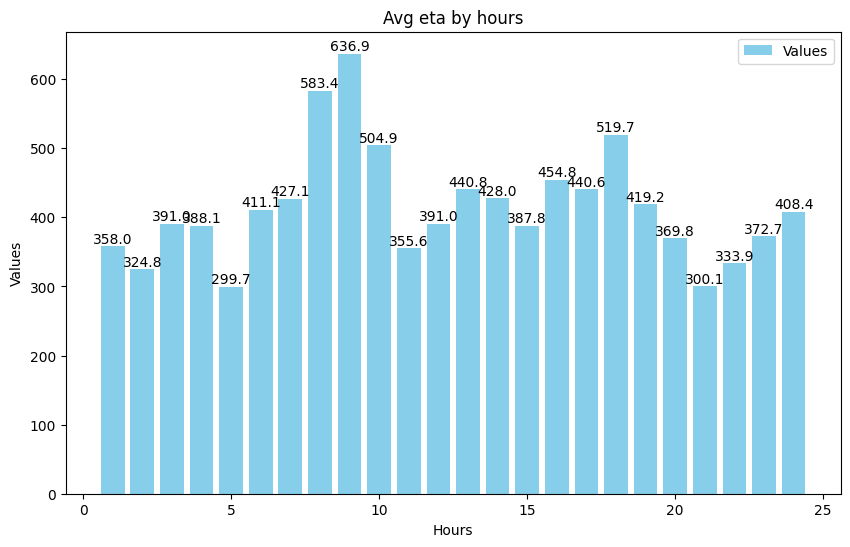

In [154]:
avg_eta = []
labels = []
for i in range(24):
    labels.append(i+1) 
    avg_eta.append(round(eta_orders.loc[eta_orders['order_datetime'] == i]['m_order_eta'].mean(), 1))
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, avg_eta, color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.title('Avg eta by hours')
plt.xlabel('Hours')
plt.ylabel('Values')
plt.legend(['Values'], loc='upper right')
plt.show()

The eta is high when about 9 a.m in the morning and 6 p.m in the afternoon, which is reasonable that the traffic is hot in the time, making eta time longer.

(5)

In [16]:
import branca.colormap as cm

In [52]:
orders['hex_index'] = orders.apply(lambda row: h3.geo_to_h3(row['origin_latitude'], row['origin_longitude'], 8), axis=1)
hex_stats = orders.groupby('hex_index').size().reset_index(name='order_counts')
hex_stats_sorted = hex_stats.sort_values(by='order_counts', ascending=False)
total_orders = hex_stats_sorted['order_counts'].sum()
target_orders = total_orders * 0.8
cumulative_orders = 0
target_hexes = []
m = folium.Map(location=[orders['origin_latitude'].mean(), orders['origin_longitude'].mean()], zoom_start=10)

In [53]:
linear = cm.LinearColormap(["yellow", "orange", "red"], vmin=1, vmax=1471)

for index, row in hex_stats_sorted.iterrows():
    hex_count = row['order_counts']
    hex_color = linear(row['order_counts'])
    boundary_color = 'red'
    hex_boundary = h3.h3_to_geo_boundary(row['hex_index'])
    cumulative_orders += row['order_counts']
    polygon = folium.Polygon(locations=hex_boundary, fill_color=hex_color, fill=True, color=boundary_color, fill_opacity=0.5, weight=1.7)
    if cumulative_orders >= target_orders:
        hex_color = 'yellow'
        boundary_color = 'yellow'
        polygon = folium.Polygon(locations=hex_boundary, fill_color=hex_color, fill=True, color=boundary_color, fill_opacity=0.25, weight=1.0)
    popup = folium.Popup(str(row['order_counts']), parse_html=True)
    polygon.add_child(popup)
    polygon.add_to(m)

m.save('hex_visualization.html')